In [1]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [2]:
df = pd.read_csv('HeartDisease.csv')
feature_cols = ['sbp', 'famhist', 'obesity', 'age']
#Separar caracteristicas y salidas
X = df.loc[:, ['sbp', 'famhist', 'obesity', 'age']]
print(X.head())#entrada
y = df.loc[:, ['chd']]#enfermo o no variable de salidad
print(y)


   sbp  famhist  obesity  age
0  160        1    25.30   52
1  144        0    28.87   63
2  118        1    29.14   46
3  170        1    31.99   58
4  134        1    25.99   49
     chd
0      1
1      1
2      0
3      1
4      1
..   ...
457    0
458    1
459    0
460    0
461    1

[462 rows x 1 columns]


In [3]:
#Split del dataset ntr training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
#Instancia tipo arbol clasificador
clf = DecisionTreeClassifier()
#Entrenar modelo
clf = clf.fit(X_train, y_train) #Entradas del modelo
#Pruebas del modelo
y_pred = clf.predict(X_test)
#Imprimir la precision del modelo
print("Accurancy: ", metrics.accuracy_score(y_test, y_pred))


Accurancy:  0.6258992805755396


|--- feature_3 <= 50.50
|   |--- feature_3 <= 24.50
|   |   |--- feature_0 <= 107.00
|   |   |   |--- feature_2 <= 20.37
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  20.37
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  107.00
|   |   |   |--- class: 0
|   |--- feature_3 >  24.50
|   |   |--- feature_0 <= 196.00
|   |   |   |--- feature_2 <= 20.10
|   |   |   |   |--- feature_2 <= 18.55
|   |   |   |   |   |--- feature_2 <= 16.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  16.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  18.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  20.10
|   |   |   |   |--- feature_0 <= 135.00
|   |   |   |   |   |--- feature_0 <= 107.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  107.00
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 21.09
|   |   |   |   |   |   |   |   |--- feature_

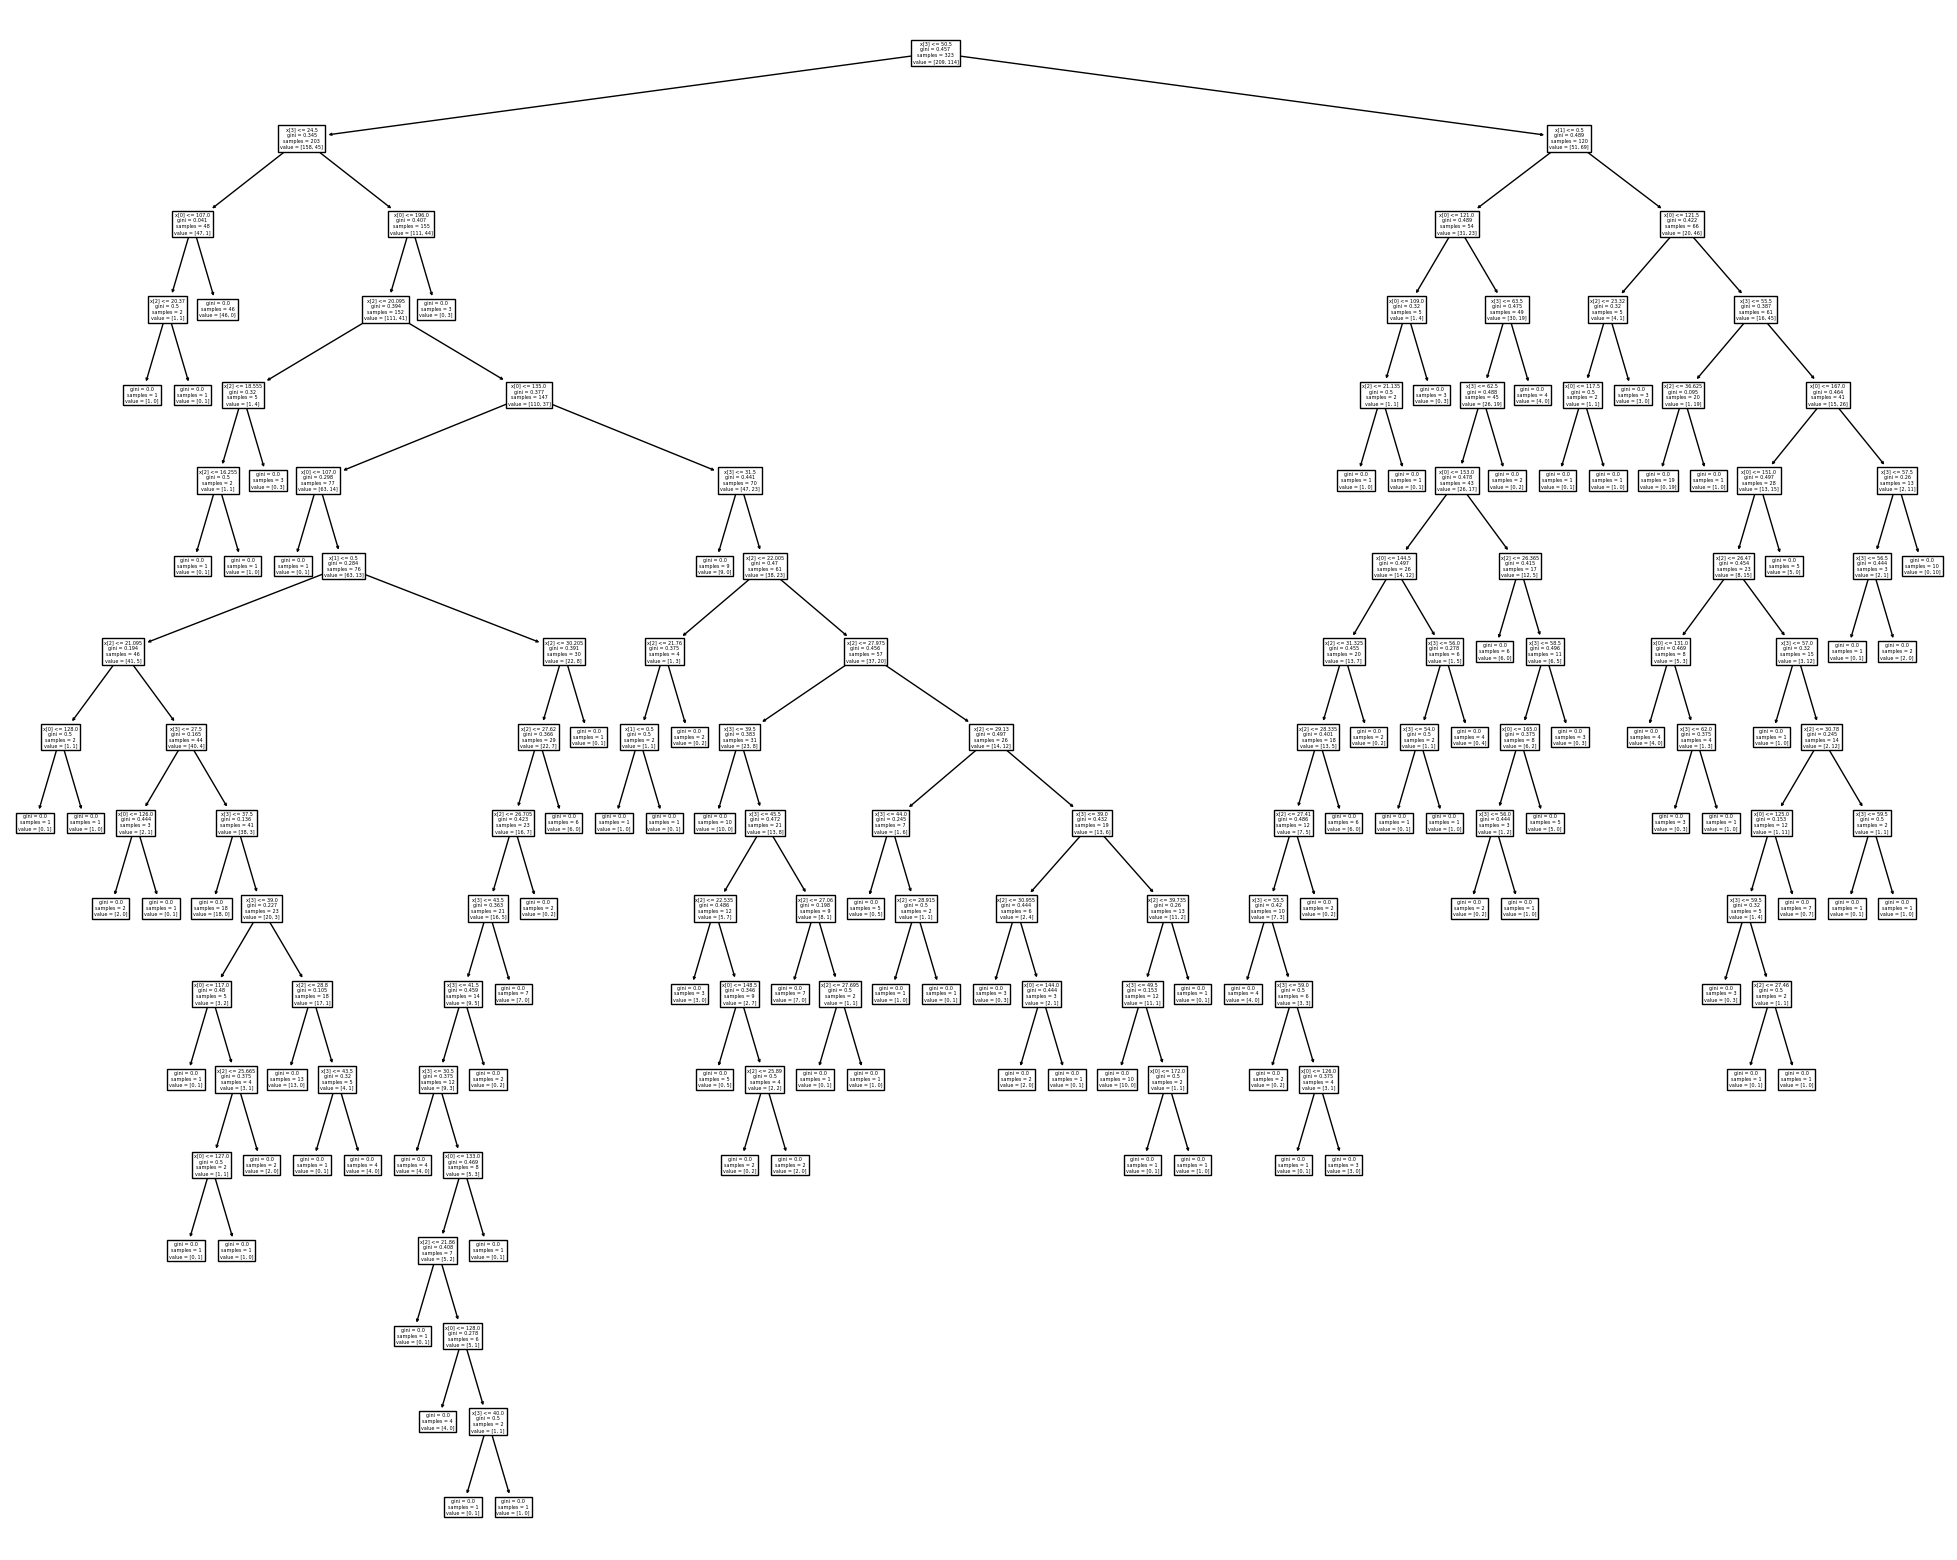

In [6]:
#Print arbol
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf)